In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from functions import *

plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
# load dataset
train_X, train_y, test_X, test_y, classes = load_data() # capital X


it is a non-cat


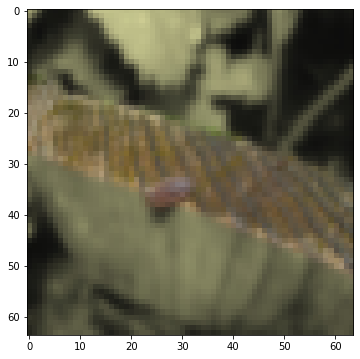

In [3]:
# show example of picture
from random import randint
i = randint(0, 208)
plt.imshow(train_X[i])
print('\nit is a ' + classes[train_y[0,i]].decode('utf-8'))

In [4]:
m_train = train_X.shape[0]
m_test  = test_X.shape[0]
num_px  = train_X.shape[1]

print('# Training examples: ' + str(m_train))
print('# Testing examples:  ' + str(m_test))
print('Size of each image:  ' + str(num_px) + ' x ' + str(num_px) + ' x 3')

# Training examples: 209
# Testing examples:  50
Size of each image:  64 x 64 x 3


In [5]:
# image to 1D vector
train_x_flatten = train_X.reshape(train_X.shape[0], -1).T
test_x_flatten  = test_X.reshape(test_X.shape[0], -1).T

# standardize data
train_x = train_x_flatten/255
test_x  = test_x_flatten/255

# print shape of train/test
print('shape of Train X: ', str(train_x.shape))
print('shape of Test X:  ', str(test_x.shape))

shape of Train X:  (12288, 209)
shape of Test X:   (12288, 50)


In [6]:
# set layers dimentions
layer_dims = [12288, 20, 7, 5, 1]

In [7]:
# model

def model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    costs = []

    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0 or i == num_iterations:
            print('Cost ater iteration {}: {}'.format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    return parameters, costs

In [8]:
# train the model

parameters, costs = model(train_x, train_y, layer_dims, num_iterations= 2000, print_cost = True)

Cost ater iteration 0: 0.7717493284237686
Cost ater iteration 100: 0.6219548960685459
Cost ater iteration 200: 0.5845665260892245
Cost ater iteration 300: 0.5280000989381161
Cost ater iteration 400: 0.38174976465074156
Cost ater iteration 500: 0.3542708448734229
Cost ater iteration 600: 0.1952220088333189
Cost ater iteration 700: 0.17787297315717174
Cost ater iteration 800: 0.08634580029967927
Cost ater iteration 900: 0.03759905897416019
Cost ater iteration 1000: 0.024521826817493007
Cost ater iteration 1100: 0.017798922895418755
Cost ater iteration 1200: 0.013723622297066276
Cost ater iteration 1300: 0.010938224858276734
Cost ater iteration 1400: 0.008994080372211676
Cost ater iteration 1500: 0.0075642274818930695
Cost ater iteration 1600: 0.006475525891767091
Cost ater iteration 1700: 0.005634851320342964
Cost ater iteration 1800: 0.00496981886092253
Cost ater iteration 1900: 0.004425978019025994


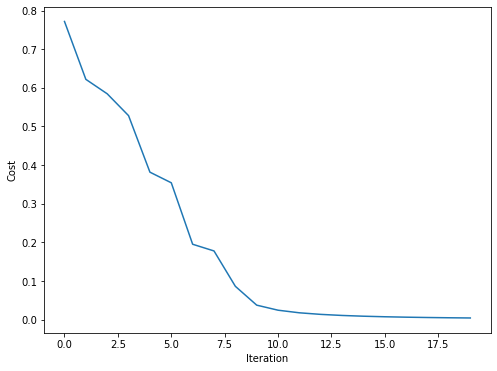

In [9]:
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [20]:
# model accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_hat = []
for i in range(len(test_X)):
    x = test_X[i] / 255.
    x = x.reshape((1, num_px * num_px * 3)).T
    y_hat.append(int(np.squeeze(predict(x, test_y[0][i], parameters))))

score = f1_score(test_y[0], y_hat, average='macro')
print('Test F1 Score: ', score)

Test F1 Score:  0.6899545266639107


Model Prediction is a "cat" picture.


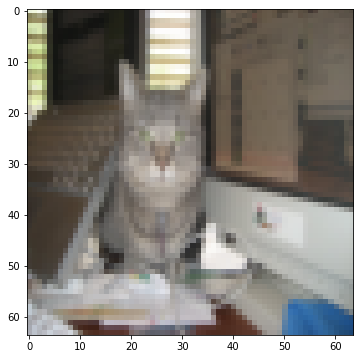

In [21]:
# test model
i = randint(0, 50)
plt.imshow(test_X[i])
image = test_X[i] / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(image, test_y[0][i], parameters)
print ("Model Prediction is a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
